## About
Set-up toy example of connected network (i.e. 1 connected component) and compare LINK vs. ReFeX performance as we recursively remove edges. This in part is motivated by the role of 'bridging actors' in the ideal points literature.

In [1]:
from __future__ import division
import community
import os
import re
import itertools
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
folder_directory =os.getcwd()
from sklearn.model_selection import ShuffleSplit
os.chdir(folder_directory)
exec(open('./functions/python_libraries.py').read())
exec(open('./functions/LINK_revised.py').read())
np.seterr(divide='ignore', invalid='ignore')
from sklearn.ensemble import BaggingClassifier # needed for logforest
exec(open('./functions/python_libraries.py').read())
#exec(open('./functions/LINK.py').read())
exec(open('./functions/parsing.py').read())  # Sam Way's Code
exec(open('./functions/mixing.py').read()) # Sam Way's Code
exec(open('./functions/create_adjacency_matrix.py').read())
np.seterr(divide='ignore', invalid='ignore')
fb100_file = '/Users/kristen/Dropbox/gender_graph_data/FB_processing_pipeline/data/0_original/'
import imblearn
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
adj_matrix_gender = np.load('../../data/AmherstAdj.npy')

In [3]:
gender_y = np.load('../../data/Amherstgender.npy')

In [4]:
gender_y

array([2, 1, 1, ..., 2, 2, 2])

In [5]:
adj_matrix_gender

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
G = nx.from_numpy_matrix(adj_matrix_gender)

In [7]:
adj_matrix_gender_remove = adj_matrix_gender.copy()

In [8]:
bridge_edge_locator = []
for edge in nx.bridges(G):
    print(edge)
    adj_matrix_gender_remove[edge[0],edge[1]] = 0
    adj_matrix_gender_remove[edge[1],edge[0]] = 0
    #print(adj_matrix_gender[edge[0],edge[1]])
    #print(adj_matrix_gender[edge[1],edge[0]])
    #print('')
    bridge_edge_locator.append(edge)

(56, 966)
(60, 105)
(132, 608)
(138, 1978)
(182, 239)
(191, 391)
(224, 1160)
(243, 692)
(270, 1280)
(270, 2022)
(369, 1043)
(405, 1720)
(566, 1702)
(596, 1113)
(648, 877)
(721, 1258)
(852, 1702)
(894, 1800)
(1005, 1953)
(1301, 1592)
(1467, 1791)


In [9]:
# Compare LINK, and ReFeX
percent_initially_unlabelled = [0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.9,0.85,0.8,0.75]#,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [10]:
(mean_accuracy_amherst, se_accuracy_amherst, 
 mean_micro_auc_amherst,se_micro_auc_amherst, mean_wt_auc_amherst_lbfgs,se_wt_auc_amherst)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender_remove), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    solver='lbfgs',
                                                                                                    C=10e20),
                                                                                                 num_iter=10) 


0.99
0.98
0.97
0.96
0.95
0.94
0.93
0.92
0.91
0.9
0.85
0.8
0.75


In [11]:
(mean_accuracy_amherst_all, se_accuracy_amherst_all, 
 mean_micro_auc_amherst_all,se_micro_auc_amherst_all, mean_wt_auc_amherst_lbfgs_all,se_wt_auc_amherst_all)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    solver='lbfgs',
                                                                                                    C=10e20),
                                                                                                 num_iter=10) 



0.99
0.98
0.97
0.96
0.95
0.94
0.93
0.92
0.91
0.9
0.85
0.8
0.75


### Try removing edges between communities. 

In [11]:
partition = community.best_partition(G)

In [12]:
np.unique(np.array(list(partition.values())), return_counts=True)

(array([0, 1, 2, 3, 4]), array([363, 256, 371, 379, 663]))

In [13]:
742/2032

0.36515748031496065

In [14]:
community_df = pd.DataFrame({'keys':range(len(partition)),
             'community': np.array(list(partition.values()))})

In [15]:
# get cross community edges
np.unique(community_df.community)

array([0, 1, 2, 3, 4])

In [16]:
idx0 = np.where(community_df.community==0)
idx0 = idx0[0]
idx1 = np.where(community_df.community==1)
idx1 = idx1[0]
idx2 = np.where(community_df.community==2)
idx2 = idx2[0]
idx3 = np.where(community_df.community==3)
idx3 = idx3[0]
idx4 = np.where(community_df.community==4)
idx4 = idx4[0]
idx5 = np.where(community_df.community==5)
idx5 = idx5[0]
idx6 = np.where(community_df.community==6)
idx6 = idx6[0]

In [17]:
print(np.shape(adj_matrix_gender))
print(np.shape(adj_matrix_gender[idx0,:][:,idx1]))

(2032, 2032)
(363, 256)


### Focus on Community 0 as Train Network and Community 1 as Test Network

In [18]:
adj_matrix_gender_remove2 = adj_matrix_gender.copy()

adj_matrix_gender_remove2[np.ix_(idx0, idx1)] = 0
adj_matrix_gender_remove2[np.ix_(idx1, idx0)] = 0
print(np.sum(adj_matrix_gender_remove2[np.ix_(idx0, idx1)]))
print(np.sum(adj_matrix_gender_remove2[np.ix_(idx1, idx0)]))


adj_matrix_gender_remove2[np.ix_(idx0, idx2)] = 0
adj_matrix_gender_remove2[np.ix_(idx2, idx0)] = 0


## decide whether to add here or not
adj_matrix_gender_remove2[np.ix_(idx0, idx3)] = 0
adj_matrix_gender_remove2[np.ix_(idx3, idx0)] = 0

adj_matrix_gender_remove2[np.ix_(idx0, idx4)] = 0
adj_matrix_gender_remove2[np.ix_(idx4, idx0)] = 0


adj_matrix_gender_remove2[np.ix_(idx0, idx5)] = 0
adj_matrix_gender_remove2[np.ix_(idx5, idx0)] = 0



adj_matrix_gender_remove2[np.ix_(idx1, idx2)] = 0
adj_matrix_gender_remove2[np.ix_(idx2, idx1)] = 0


adj_matrix_gender_remove2[np.ix_(idx1, idx3)] = 0
adj_matrix_gender_remove2[np.ix_(idx3, idx1)] = 0

adj_matrix_gender_remove2[np.ix_(idx1, idx4)] = 0
adj_matrix_gender_remove2[np.ix_(idx4, idx1)] = 0


adj_matrix_gender_remove2[np.ix_(idx1, idx5)] = 0
adj_matrix_gender_remove2[np.ix_(idx5, idx1)] = 0





0.0
0.0


In [22]:
(mean_accuracy_amherst_sub, se_accuracy_amherst_sub, 
 mean_micro_auc_amherst_sub,se_micro_auc_amherst_sub, mean_wt_auc_amherst_lbfgs_sub,se_wt_auc_amherst_sub)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender_remove2), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                    solver='lbfgs',
                                                                                                    C=10e20),
                                                                                                 num_iter=10) 




0.99
0.98
0.97
0.96
0.95
0.94
0.93
0.92
0.91
0.9
0.85
0.8
0.75


### train on one community, test on the other

In [24]:
# try varying percent of nodes labeled in a community
clf = linear_model.LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    C=10e20)

In [25]:
# fit model on modified network removing cross-community edges
clf.fit(adj_matrix_gender_remove2[idx0,:], np.ravel(np.array(gender_y)[idx0]))
#clf.fit(feature_x[train], np.ravel(membership_y[train]))

LogisticRegression(C=1e+21, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# between- community edges removed
test = idx1.copy()#np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
prob = clf.predict_proba(adj_matrix_gender_remove2[test])
print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                prob[:,1],average='weighted'))

0.5


In [27]:
clf.fit(adj_matrix_gender[idx0,:], np.ravel(np.array(gender_y)[idx0]))

test = idx1.copy() #np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]

prob = clf.predict_proba(adj_matrix_gender[test])

print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                prob[:,1],average='weighted'))

0.7603211009174313


In [28]:
## find where there were connections across communities
list(zip(*np.where(adj_matrix_gender[np.ix_(idx0, idx1)] ==1 )))[0]
#list(zip(*np.where(adj_matrix_gender_remove2[np.ix_(idx0, idx1)] ==1 )))
#pd.DataFrame(adj_matrix_gender).iloc[idx0, idx1]

(0, 70)

## Add back in direct community links

In [20]:
clf = linear_model.LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    C=10e20)

In [51]:
## recover edges and add back in
## list of edges between community 0 
auc_community_record_list = []
for k in range(50):
    auc_community_record = []

    adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

    counter = 0
    for j in np.random.permutation(list(zip(*np.where(adj_matrix_gender[np.ix_(idx0, idx1)] ==1 )))):        
            # randomly add edge back in
            adj_matrix_gender_remove2_add_edges_back[(idx0[j[0]], idx1[j[1]])] = 1
            adj_matrix_gender_remove2_add_edges_back[(idx1[j[1]], idx0[j[0]])] = 1

            counter = counter + 1

            if(counter % 50 == 0):
                clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                test = idx1.copy()#np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[test])
                #print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                #                                prob[:,1],average='weighted'))
                auc_community_record.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                prob[:,1],average='weighted'))

    print('***',len(auc_community_record))
    num_y = len(auc_community_record)
    ## 2) explore adding edges back in via a more targeted approach

    auc_community_record_list.append(auc_community_record)

*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55
*** 55


In [52]:
orig = np.array(np.mean(np.matrix(auc_community_record_list), 0))[0]
orig

array([0.53827167, 0.55024908, 0.56610256, 0.56648596, 0.57208547,
       0.57759463, 0.59011661, 0.59366667, 0.60143162, 0.60771795,
       0.61272772, 0.61589438, 0.62270696, 0.62602076, 0.6288895 ,
       0.6343199 , 0.63775702, 0.64101221, 0.64185775, 0.64252503,
       0.64886264, 0.65336264, 0.65547863, 0.65719048, 0.65971184,
       0.65928083, 0.66244567, 0.66372161, 0.66542125, 0.66834799,
       0.67005433, 0.6718779 , 0.67385287, 0.67768437, 0.67763675,
       0.68087302, 0.68296337, 0.68431074, 0.68754518, 0.68950183,
       0.69072039, 0.69247314, 0.69287851, 0.69340965, 0.69343529,
       0.69505433, 0.6960464 , 0.69818376, 0.6993254 , 0.70037179,
       0.70088828, 0.70356044, 0.70473565, 0.70548535, 0.70763492])

In [53]:
### OLD
## recover edges and add back in
## list of edges between community 0 
auc_community_record = []

adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

counter = 0
for j in np.random.permutation(list(zip(*np.where(adj_matrix_gender[np.ix_(idx0, idx1)] ==1 )))):        
        # randomly add edge back in
        adj_matrix_gender_remove2_add_edges_back[(idx0[j[0]], idx1[j[1]])] = 1
        adj_matrix_gender_remove2_add_edges_back[(idx1[j[1]], idx0[j[0]])] = 1
        
        counter = counter + 1
        
        if(counter % 50 == 0):
            clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
            test = idx1.copy()#np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
            prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[test])
            #print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
            #                                prob[:,1],average='weighted'))
            auc_community_record.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                            prob[:,1],average='weighted'))

print('***',len(auc_community_record))
num_y = len(auc_community_record)
## 2) explore adding edges back in via a more targeted approach

option = 'c' # 'b'

if option == 'a':
## a) exhaustively add back in
    idx0_permute = np.random.permutation(idx0)
    idx1_permute = np.random.permutation(idx1)

    for j in idx0_permute:#zip(idx0, idx2):
        for i in idx1_permute:
            adj_matrix_gender_remove2_add_edges_back[(j, i)] = 1
            adj_matrix_gender_remove2_add_edges_back[(i, j)] = 1
            counter = counter + 1
            #print(counter %500)
            if(counter<5000):
                if(counter % 50 == 0):

                    clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                    test = idx1.copy()#np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                    prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[test])
                    #print(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                    #                                prob[:,1],average='weighted'))
                    auc_community_record.append(metrics.roc_auc_score(label_binarize(gender_y[test],np.unique(gender_y)),
                                                    prob[:,1],average='weighted'))


*** 55


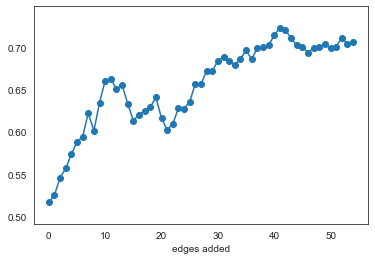

In [22]:
%matplotlib inline
plt.scatter(range(len(auc_community_record)),
           auc_community_record)
plt.plot(range(len(auc_community_record)),
           auc_community_record)


#plt.axvline(num_y, color = 'gray')
plt.xlabel('edges added')
plt.show()

In [23]:
auc_community_record_alternative = []
adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()
counter = 0

## initial fit on community 0, print auc on community 1
clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
#test = np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[idx1,:])
#print(prob)
print(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                                prob[:,1],average='weighted'))

0.5


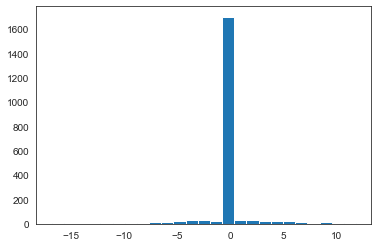

In [24]:
%matplotlib inline
plt.hist(clf.coef_[0], bins = 25)
plt.show()

In [29]:
## recover edges and add back in
## list of edges between community 0 
auc_community_record_alternative = []

adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

counter = 0

## Option A: Randomly, and exhaustively Add all Edges
idx0_permute = np.random.permutation(idx0)
idx1_permute = np.random.permutation(idx1)

#for j in idx0_permute:#zip(idx0, idx2):
#    for i in idx1_permute:
tmp = []
for j in idx0_permute:
    for i in idx1_permute:
        tmp.append((j,i))

tmp = np.random.permutation(tmp)
for j in tmp:

        adj_matrix_gender_remove2_add_edges_back[(j[0], j[1])] = 1
        adj_matrix_gender_remove2_add_edges_back[(j[1], j[0])] = 1
        counter = counter + 1
        if(counter<5000):
            if(counter % 50 == 0):
                clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                #test = np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[idx1])
                #print(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                #                                prob[:,1],average='weighted'))
                auc_community_record_alternative.append(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                                                prob[:,1],average='weighted'))



In [43]:
## recover edges and add back in
## list of edges between community 0 
auc_community_record_alternative_list = []
for k in range(50):
    auc_community_record_alternative = []

    adj_matrix_gender_remove2_add_edges_back = adj_matrix_gender_remove2.copy()

    counter = 0

    ## Option A: Randomly, and exhaustively Add all Edges
    idx0_permute = np.random.permutation(idx0)
    idx1_permute = np.random.permutation(idx1)

    #for j in idx0_permute:#zip(idx0, idx2):
    #    for i in idx1_permute:
    tmp = []
    for j in idx0_permute:
        for i in idx1_permute:
            tmp.append((j,i))

    tmp = np.random.permutation(tmp)
    for j in tmp:

            adj_matrix_gender_remove2_add_edges_back[(j[0], j[1])] = 1
            adj_matrix_gender_remove2_add_edges_back[(j[1], j[0])] = 1
            counter = counter + 1
            if(counter<5000):
                if(counter % 50 == 0):
                    clf.fit(adj_matrix_gender_remove2_add_edges_back[idx0,:], np.ravel(np.array(gender_y)[idx0]))
                    #test = np.array(range(len(gender_y)))[~np.in1d(np.array(range(len(gender_y))), idx0)]
                    prob = clf.predict_proba(adj_matrix_gender_remove2_add_edges_back[idx1])
                    #print(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                    #                                prob[:,1],average='weighted'))
                    auc_community_record_alternative.append(metrics.roc_auc_score(label_binarize(gender_y[idx1],np.unique(gender_y)),
                                                    prob[:,1],average='weighted'))

    auc_community_record_alternative_list.append(auc_community_record_alternative)

In [44]:
np.shape(np.matrix(auc_community_record_alternative_list))

(50, 99)

In [45]:
len(np.mean(np.matrix(auc_community_record_alternative_list), 0))

1

In [46]:
alt = np.array(np.mean(np.matrix(auc_community_record_alternative_list), 0))[0]

In [47]:
from matplotlib.backends.backend_pdf import PdfPages



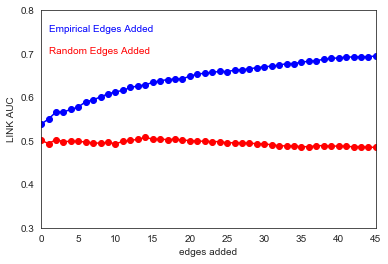

In [55]:
%matplotlib inline
plt.scatter(range(len(orig)),
           orig, color = 'blue')
plt.plot(range(len(orig)),
           orig, color = 'blue')

plt.scatter(range(len(alt)),
           alt, color = 'red')
plt.plot(range(len(alt)),
           alt, color = 'red')
plt.axvline(50, color = 'blue')
plt.xlabel('edges added')
plt.text(1,0.75, 'Empirical Edges Added', color = 'blue')
plt.text(1,0.7, 'Random Edges Added', color = 'red')
plt.ylabel('LINK AUC')

plt.ylim(0.3,0.8)
plt.xlim(0,45)
#plt.show()
pp = PdfPages('../../figs/AcrossToWithinSample.pdf')
pp.savefig()
pp.close()